# Week 6. Optimization. Programming Task

### For grading

In [1]:
#DO NOT CHANGE
import grading
import grading_utils

In [2]:
#DO NOT CHANGE
grader = grading.Grader(assignment_key="Aoii7s9WRQyvONf6kwwjAw", 
                        all_parts=["NCrTc", "JigtH", "HlACv"])

In [3]:
# token expires every 30 min
COURSERA_TOKEN = "cdqR1M12CoIDM8Ef"### YOUR TOKEN HERE
COURSERA_EMAIL = "jeevesh@iitkgp.ac.in"### YOUR EMAIL HERE

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [4]:
import numpy as np
import pandas as pd

### Task 1. Reading and Preparing

In [5]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [6]:
!pip install seaborn

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

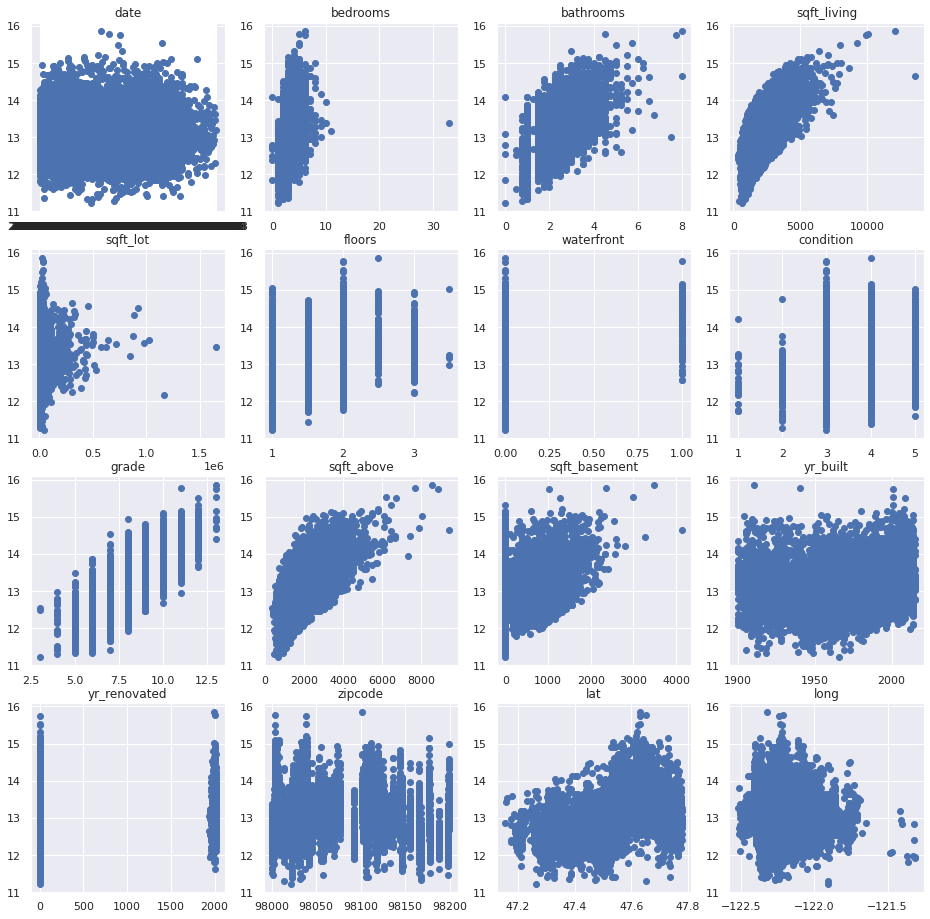

In [8]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

**Warning**: Please use features in the order mentioned above!

In [9]:
X=pd.DataFrame(datX, columns=['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat'])
shape=X.shape
N,m=shape[0],shape[1]
print(str(N) + " " + str(m))

15000 10


Run the following cells to automatically check results of your code:

In [10]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("NCrTc", grading_utils.test_reader(X, N, m))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`. 
**Attention**: try to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [11]:
def loss(w, X, y):
    N=X.shape[0]
    ones=np.ones((N, 1))
    X2=np.concatenate((ones,X), axis=1)
    s = np.sum(((w*X2).sum(axis=1)-y)**2)
    lossValue=1.0/N*s
    return lossValue

Run the following cells to automatically check results of your code:

In [12]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("JigtH", grading_utils.test_loss(loss, X, datY))

In [13]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$
Please, enter your answer in the cell below (it should be a `markdown` cell). You can either specify each partial derivative $\frac{\partial Loss}{\partial w_i}$ or $\nabla Loss$ altogether using matrix operations.

$ \frac {\partial Loss} {\partial w_i} $ = $\frac{2}{N}$ $\sum_{i=1}^{N}$ $(y_i - \hat{y}_{i})$ $x_{i}m $

### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 
**Attention**: try to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

In [14]:
def grad(w_k, X, y):
    N=X.shape[0]
    ones=np.ones((N, 1), dtype=int)
    X2=np.concatenate((ones,X), axis=1)
    y_cap=(w_k*X2).sum(axis=1)
    lossGradient=0
    lossGradient=2.0/N*((X2.T).dot(y_cap-y))
    return lossGradient

Run the following cells to automatically check your function. 

In [15]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("HlACv", grading_utils.test_grad(grad, X, datY))

In [16]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 5. Write gradient descent
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k}
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [17]:
from sklearn.preprocessing import normalize

In [18]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    
    curiter=0
    w_k=weights[-1]
        
    lossValue_k=np.inf
    n = 0
    while (n < maxiter) and (lossValue_k > eps):
        w_k=w_k-alpha*grad(w_k,normX,y)
        lossValue_k=loss(w_k,normX,y)
        weights.append(w_k)
        losses.append(lossValue_k)
        n += 1
        
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

In [19]:
pd.DataFrame(datY).loc[8696]

0    13.399995
Name: 8696, dtype: float64

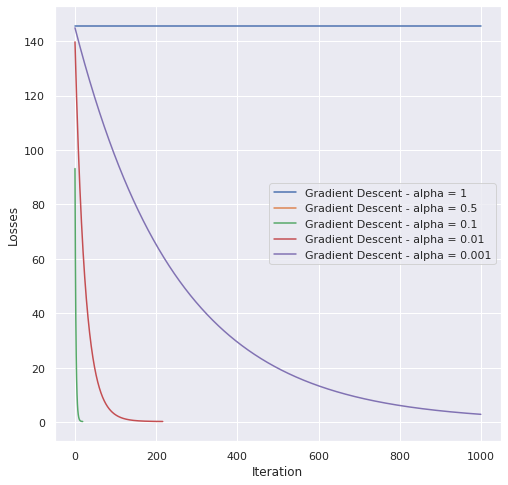

In [20]:
plt.figure(figsize=(8,8))

#your code goes here
w_init=np.ones((1,X.shape[1]+1))
alphas=[1, 0.5, 0.1, 0.01, 0.001]
maxiter=1000
error=0.3
weightList=[]
for alpha in alphas:
    normX=pd.DataFrame(np.array(normalize(X, axis=0, norm='l1')), columns=['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat'])
    gd=gradDescent(w_init, alpha, normX, datY, maxiter, error)
    weights, losses=gd
    weightList.append(weights)
    xAxis=list(range(len(losses)))
#     print(len(losses))
#     print(losses)
    plt.plot((losses),label='Gradient Descent - alpha = ' + str(alpha))
plt.xlabel('Iteration')
plt.ylabel('Losses')
plt.legend()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

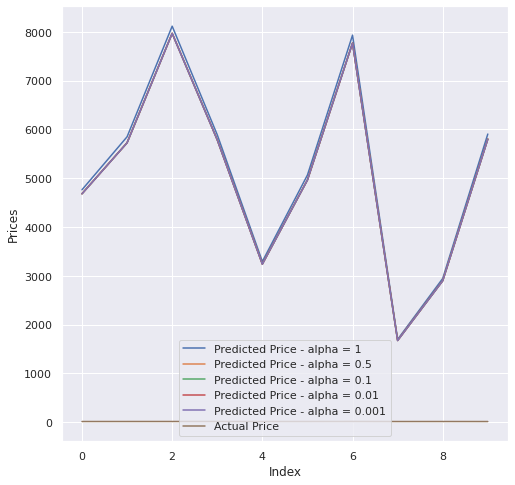

In [21]:
plt.figure(figsize=(8,8))
sampleX=X.sample(n=10)
# print(sampleX)
indices=sampleX.loc[sampleX['sqft_above']>0].index.values
# print(indices)
N=sampleX.shape[0]
ones=np.ones((N, 1), dtype=int)
sampleX2=np.concatenate((ones,sampleX), axis=1)
# print(sampleX2)
alphas=[1, 0.5, 0.1, 0.01, 0.001]
for i in range(len(alphas)):
    w_init=weightList[i][-1]
#     print(w_init)
    y_cap=((w_init)@(sampleX2.T))
#     print(y_cap[0])
    plt.plot(y_cap[0],label='Predicted Price - alpha = ' + str(alphas[i]))
answerY=pd.DataFrame(datY).loc[indices,:]
answerY=np.array(answerY).tolist()
# print(answerY)
plt.plot(answerY,label='Actual Price')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.legend()

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough?

It is not 100% matching with the predicted value but contains some error.

### Task 6. Discussion
Answer following questions:
1. Does your method converge at least for some alpha? If not, what might be the workaround?
2. How does changing of the alpha influence the speed of convergence?
3. Are the optimal weights in all convergent cases the same?
4. How does this affect the Loss function?

1. After normalization, gradient descent converges for all values of $\alpha < 1$. For $\alpha = 0.5$, the convergence occurred in just 2 steps with an error of the order of $0.1$

2. If we decrease the a value of $\alpha$, the speed of convergence is observed to be slow, but the curve is much smoother

3. No. They are not the same in every case. They are slightly different.

4. The value of weights are the multipliers for the features. Depending on the value of $\hat {y}$ calculated above, the predicted values of house prices change and choosing the optimal $\alpha$, will yield a minimum value for loss function